# Data Scraping (CS 109 - Lec2)

Based on: https://github.com/cs109/2015/tree/master/Lectures

In [1]:
## all imports
from IPython.display import HTML
import numpy as np
from urllib import request # urllib2 isn't supported by P3 - https://stackoverflow.com/questions/58794540/no-module-named-urllib2-how-do-i-use-it-in-python-so-i-can-make-a-request
import bs4 #this is beautiful soup
import time
import operator
import socket
import pickle # was CPickle, but again use pickly for P3
import re # regular expressions
import csv
from datetime import date as d

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from secrets import *

In order to effectively scrape, we need to understand a little HTML:

This is an example for a minimal webpage defined in HTML tags. The root tag is html and then you have the head tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The body tag marks the actual content of the page. You can play around with the h2 tag trying different header levels. They range from 1 to 6.

In [2]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

### Scraping a simple webpage

a beautifully simple webpage (the Beautiful Soup info page): http://www.crummy.com/software/BeautifulSoup

In Chrome: Ctrl+Shift+I shows the html - allowing me to to search for what I want

### Scraping with Python
different useful libraries:
* urllib
* beautifulsoup
* pattern
* soupy
* LXML
...

The following cell just defines a url as a string and then reads the data from that url using the urllib library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [3]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = request.urlopen(url).read().decode() # decode needed due to bug(?) that returns the output from urlopen as bytes instead of string
# print(source) # uncomment this to see the HTML content of the page in the string variable source

### Quiz:

1. is the word 'Alice' in source?
2. count the occurence of the word 'soup'
3. At what index occurs the string: 'COVID-19'?

In [4]:
## is 'Alice' in source?
print("Alice" in source)

## count the occurence of the word 'soup'
print(source.count('Soup'))

## At what index occurs the string: 'COVID-19'?
position = source.find('COVID-19')
print(position)

False
50
7309


In [5]:
## Check I got this right
print(source[position:position+len('COVID-19')])

COVID-19


## Beautiful Soup

* parses html code
* makes life a load easier

In [6]:
# turns source into a bs4 object
soup = bs4.BeautifulSoup(source)

print(soup)
print('\n \n \n AND PRETTIFIED! \n \n \n')
print(soup.prettify()) # so much more readable!

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>
<img align="right" src="10.1.jpg" width="250"/><br/>
<p>[ 

In [7]:
# 'The findAll method traverses the tree, starting at the given point, and finds all the Tag and NavigableString objects that match the criteria you give.'
soup.findAll('a') # this will return all links with attributes

[<a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="enterprise.html">For enterprise</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG">Changelog</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a href="https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&amp;utm_medium=referral&amp;utm_campaign=enterprise" target="_blank">
 <span class="cta">
   Beautiful Soup for enterprise available via Tidelift
  </span>
 </a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion
 gr

### Some Examples:

Here we want to extract the links from the above:

In [8]:
# so let's create a variable of all of the links with attributes
# this will only return the first occurence in the string:
first_tag = soup.find('a')

# then we pull the hred attributes:
first_tag.get('href')

# get all the links in the page:
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

['#Download',
 'bs4/doc/',
 '#HallOfFame',
 'enterprise.html',
 'https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'bs4/download/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'zine/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.2.tar.gz',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_sourc

In [9]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/BlankerL/DXY-COVID-19-Crawler',
 'ht

In [10]:
# and we can put this in a list comprehension as well, it almost reads like 
# a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/BlankerL/DXY-COVID-19-Crawler',
 'ht

Side-note: List comprehension is something I've come accross but not used extensively - more detail here: https://www.pythonforbeginners.com/basics/list-comprehensions-in-python

## Parsing the Tree

The HTML tree:
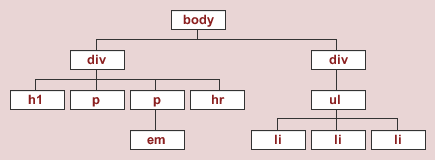

Useful document for understanding the different elements in HTML: https://www.w3.org/TR/html401/struct/global.html

# I'm going to go off-syllabus here
#### I want to scrape Rightmove for potential properties for me and my mates to move into once this whole COVID thing is over!
I'll start simple and probably build this out over time!

@maksimKorzh's scraper here: https://github.com/maksimKorzh/one-time-scrapers/blob/master/scrapers/rightmove_scraper.py was a huge help

In [41]:
url = 'https://www.rightmove.co.uk/property-to-rent/find.html?locationIdentifier=STATION%5E1400&minBedrooms=4&maxPrice=6000&minPrice=3000&radius=1.0&propertyTypes=&includeLetAgreed=false&mustHave=&dontShow=&furnishTypes=&keywords='
source = request.urlopen(url).read().decode()
soup = bs4.BeautifulSoup(source, 'lxml')
pretty_soup = soup.prettify()

So now the html has been parsed to lxml, I need to create the different component variables that I'm looking for:

In [127]:
# get the headline (i.e. the number of rooms and type of building):
title = [title.text.strip() for title in soup.findAll('h2', {'class': 'propertyCard-title'})] # list comprehension woop! So I believe that the text attribute is specific to BS?
print(title)
print()

# get the address:
address = [address['content'] for address in soup.findAll('meta', {'itemprop': 'streetAddress'})] #need only the content element
print(address)
print()

#get the number of miles from the station in question:
miles = [miles.text.strip() for miles in soup.findAll('div', {'class': 'propertyCard-distance'})]
print(miles)
print()

#get the property description:
desc = [desc.text.strip() for desc in soup.findAll('span', {'itemprop':'description'})]
print(desc)
print()

#get the date added to the site:
dateadded = [dateadded.text.strip() for dateadded in soup.findAll('span', {'class': 'propertyCard-branchSummary-addedOrReduced'})]
print(date)
print()

#get the estate agent's name:
agent = [agent.text.strip() for agent in soup.findAll('span', {'class': 'propertyCard-branchSummary-branchName'})]
print(agent)
print()

#get the agent's number:
number = [number.text.strip() for number in soup.findAll('a', {'class': 'propertyCard-contactsPhoneNumber'})]
print(number)
print()

#get the property's price:
price = [price.text.strip() for price in soup.findAll('span', {'class': 'propertyCard-priceValue'})]
print(price)
print()

#link to the property's page:
link = ['https://www.rightmove.co.uk' + link['href'] for link in soup.findAll('a', {'class': 'propertyCard-headerLink'})]
print(link)

['4 bedroom terraced house', '4 bedroom terraced house', '4 bedroom maisonette', '5 bedroom flat', '4 bedroom mews house', '4 bedroom house', '4 bedroom semi-detached house', '4 bedroom flat', '5 bedroom flat', '4 bedroom terraced house', '4 bedroom terraced house', '4 bedroom terraced house', '4 bedroom flat', '4 bedroom terraced house', '4 bedroom character property', '4 bedroom house', '4 bedroom terraced house', '4 bedroom house', '4 bedroom terraced house', '4 bedroom mews house', '4 bedroom house', '4 bedroom detached house', 'Property', 'Property', 'Property']

['Stmathews Rd, Brixton, SW2', "St Matthew's Road, Brixton Hill, London", 'Burgate Court, London', 'Stockwell Green', 'Hazlewood Mews, London, SW9', 'Park Hill Clapham SW4', 'Kings Avenue, London, SW4', 'Aytoun Road, London, SW9', 'Edithna Road ', 'Welby Street, Camberwell, London, SE5', 'Sudbourne Road, Brixton', 'Torrens Road, Brixton', 'Aristotle Road, SW4', 'Stockwell Park Road, London, SW9', 'Hinton Road, London, SE2

YASYASYASYAS it works

In [120]:
results = []
count = sum(1 for i in price if not i is '')
print(count)

for index in range(0, count):
    results.append({
        'date_added to file' : d.today().strftime("%d/%m/%Y"), #https://www.programiz.com/python-programming/online-compiler/?ref=957b4f50
        'title' : title[index],
        'address' : address[index],
        'miles from station' : miles[index],
        'description' : desc[index],
        'price' : price[index],
        'date added/price changed' : dateadded[index],
        'agent' : agent[index],
        'agent phone number' : number[index],
        'link to property' : link[index]
    })

22


In [121]:
print(len(results))
print()
results

# produces dictionary within a list

22



[{'date_added to file': '22/04/2020',
  'title': '4 bedroom terraced house',
  'address': 'Stmathews Rd, Brixton, SW2',
  'miles from station': '0.45 miles from station',
  'description': 'We are proud to offer this delightful 4 bedroom, 2 bathroom terraced house in a great location. Available to move in from 15 April 2020, this property benefits from garden access. Property is off... ** Property Reference: 763526 **',
  'price': '£3,000 pcm',
  'date added/price changed': 'Added on 15/04/2020',
  'agent': 'by OpenRent, London',
  'agent phone number': '020 3322 3265',
  'link to property': 'https://www.rightmove.co.uk/property-to-rent/property-78946597.html'},
 {'date_added to file': '22/04/2020',
  'title': '4 bedroom terraced house',
  'address': "St Matthew's Road, Brixton Hill, London",
  'miles from station': '0.45 miles from station',
  'description': 'Ideally located four bedroom house is perfect for sharers or a large family. This property comprises a large living area, separa

In [122]:
df = pd.DataFrame.from_dict(results)
df.to_csv('properties.csv',encoding='utf-8', mode='w')
df.to_csv('properties_cumulative.csv',encoding='utf-8', mode='a')

#### For more scraping see the Property_Scraper repository


# Using an API:

The Rotten Tomatoes API in the tutorial has been taken down >:/

So we'll play around with a free Twitter API.

API Keys:
* required for data access
* identifies application (you)
* monitors usage
* limits rates

In [2]:
pip install python-twitter

Note: you may need to restart the kernel to use updated packages.


It is extremely important to hide the API keys.

We can use environmental variables for this: https://towardsdatascience.com/how-to-hide-your-api-keys-in-python-fb2e1a61b0a0

(N.B. as an aside, this has introduced me to Virtual Environments! https://realpython.com/python-virtual-environments-a-primer/

* conda install nb_conda in the terminal
* conda create --name [name] --clone root in the terminal
* and this article gives an explanation of how to add the environment to Jupyter https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084)

In [5]:
import twitter
api = twitter.Api(

$CONDA_PREFIX
